# Adaptive Metropolis-Hastings example


### Load libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'library')))

from mcmc_utils import target_distribution
from mcmc_algorithms import adaptive_metropolis_hastings

### Run the model

In [13]:
# Define a custom target distribution using a mathematical expression
expression = '0.3 * exp(-0.5 * x**2) / sqrt(2 * pi) + 0.7 * exp(-0.5 * (x - 8)**2) / sqrt(2 * pi)'

# Create the target distribution function with a custom expression
target_dist_custom = target_distribution(expression)

# Use the target_dist_custom function in your MCMC sampler
initial_value = 0.0
num_iterations = 100000

samples, elapsed_time, overall_acceptance_rate, acceptance_rates = adaptive_metropolis_hastings(
        target_dist_custom, initial_value, num_iterations
    )

Sampling: 100%|██████████| 100000/100000 [00:49<00:00, 2031.29iteration/s, acceptance_rate=0.00072]


### Summary

In [14]:
# Print time taken and overall acceptance rate
print(f"Time taken: {elapsed_time:.2f} seconds")
print(f"Overall acceptance rate: {overall_acceptance_rate:.2f}")

Time taken: 49.23 seconds
Overall acceptance rate: 0.42


### Plots

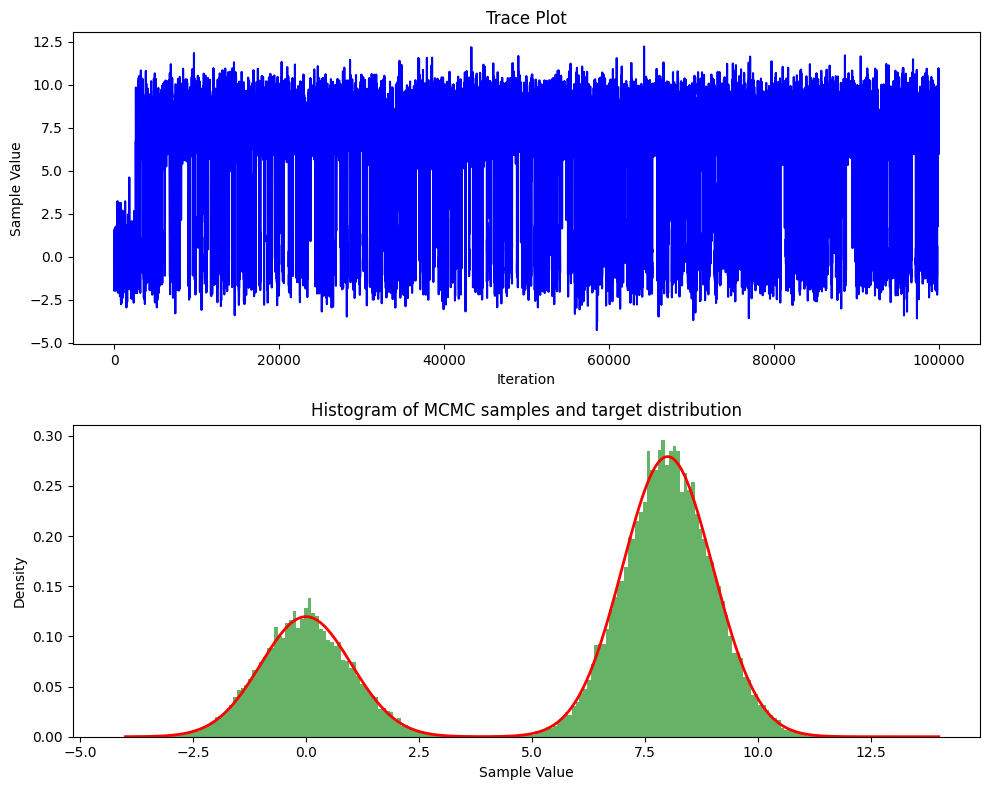

In [18]:
# Plot trace plot and histogram
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot trace plot
ax1.plot(samples, color='blue')
ax1.set_title('Trace Plot')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Sample Value')

# Plot histogram of samples and target distribution
ax2.hist(samples, bins=200, density=True, alpha=0.6, color='g')
x = np.linspace(-4, 14, 1000)
ax2.plot(x, target_dist_custom(x), 'r', lw=2)
ax2.set_title('Histogram of MCMC samples and target distribution')
ax2.set_xlabel('Sample Value')
ax2.set_ylabel('Density')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

### Run the model multiple times and track time

In [19]:
# Parameters
initial_value = 0.0
iterations_list = [100, 200, 500, 1000, 2000, 2500]
times_taken = []

# Run MCMC sampler for different numbers of iterations
for num_iterations in iterations_list:
    start_time = time.time()
    samples, elapsed_time, overall_acceptance_rate, acceptance_rates = adaptive_metropolis_hastings(
            target_dist_custom, initial_value, num_iterations
        )
    end_time = time.time()
    times_taken.append(elapsed_time)
    print(f"Iterations: {num_iterations}, Time taken: {elapsed_time:.2f} seconds, Acceptance rate: {acceptance_rate:.2f}")

NameError: name 'time' is not defined

In [ ]:
# Plot time taken for different numbers of iterations
plt.figure(figsize=(10, 6))
plt.plot(iterations_list, times_taken, marker='o')
plt.title('Time Taken for Different Numbers of Iterations using Metropolis-Hastings Algorithm')
plt.xlabel('Number of Iterations')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.show()